# Clustering

<br>

One of the most common use cases in unsupervised machine learning is the identification of clusters - discrete groups of samples which are somehow closer related to samples within the same cluster than they are with those outside. Once we abstract our data in to a general *d*-dimensional space of N samples, we can quickly start to apply our intuition to how to determine cluster membership. 

You may be wondering which clustering algorithm is the best to find "natural subgroups" in your data? Well, the nature of the data will answer that question:
- For example, a large dataset could preclude computationally intensive algorithms (e.g *hierarchical clustering* or *affinity propagation*). 
- Is anything known about the underlying structure (e.g. globular versus non-globular)? 
- Are you looking for a specific number of clusters? 
- So, unfortunately, you need to have various algorithms in your toolbox, ready to deploy as the circumstances dictate 

---

![title](./assets/scatter-2d.png)

**If you were to manually group the data in the above graph, how would you do it?**<br>
    You might draw two circles, like this:
    
![title](./assets/scatter-2d-circled.png)    

And this is what we obtain using an appropriate clustering algorithm (e.g. Gaussian mixture model):

![title](./assets/scatter-2d-segments.png)

But before delving into advanced models like GMM, we have to introduce the basics.

## K-means

This is the most fundamental clustering algorithm. 

<img src="assets/KMeans_animation.gif" style="float:left"/>

Assuming we know *a priori* the number of clusters (k), the algorithm starts by placing k coordinates (centroides c) in the feature space. First all samples are assigned to their closest centroid. Once assigned, we update the centroid location as the mean of all the samples belonging to it. These steps are allowed to continue until convergence.

## Import libraries

In [1]:
from pycaret.clustering import *
import plotly.express as px

import pandas as pd

from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs # to generate new datasets

## Make simple dataset for clustering

In [2]:
# create points on 4 clusters
# X has the data points (coordinates) and y has classes
X, y = make_blobs(n_samples=200, centers=4, random_state=42, cluster_std=1.5)

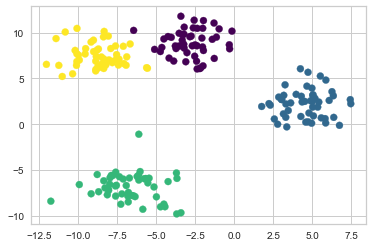

In [3]:
# visualize the example data

# function for easy plotting
def scatter(X, y=None, ax=plt):
    ax.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
    
# call that function to draw a scatterplot    
scatter(X,y)

<div class='alert alert-warning'>
    <h4> Exercise 1. a) Create a new dataset that has 180 samples, 5 clusters, 3 features and standard deviation is 1,2. </h4>
    <h4> b) Plot the first and third features of the data </h4>

In [ ]:
# Ex1 a)


In [ ]:
# Ex2 b)


## Pycaret

Pycaret is a low-code and beginner-friendly machine learning (ML) library in Python that automates and speeds up the ML-workflow. Pycaret replaces hundreds of lines of code with only a few.

### Clustering in Pycaret

PyCaret's clustering module provides several pre-processing features that can be configured when initializing the setup through the `setup()` function. It has over 8 algorithms and several plots to analyze the results. PyCaret's clustering module also implements a unique function called `tune_model()` that allows you to tune the hyperparameters of a clustering model to optimize a supervised learning objective such as R^2 for regression.

`setup()` is Pycaret's main function and it needs to be run before executing any other function in pycaret. The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [4]:
# setup() has lots of parameters for e.g. preprocessing, but let's run it with defaults
s = setup(X)

,Description,Value
0,Session id,7920
1,Original data shape,"(200, 2)"
2,Transformed data shape,"(200, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,constant
8,Low variance threshold,0
9,CPU Jobs,-1


In [5]:
# pycaret offers many clustering algorithms. We can test and compare them
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


## Create a model

Next let's create kmeans model. Without additional parameters it will use 4 clusters as default but if you know the number of clusters beforehand you can pass it using `num_clusters` parameter. In this case we know there is supposed to be 5 clusters and we're gonna use that.

In [6]:
kmeans = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5714,868.5465,0.7351,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Pycaret will print some useful metrics. Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1, where 1 means that clusters are well apart from each other and clearly distinguished, 0 means that clusters are indifferent ie. the distance between clusters is not significant, and -1 means that clusters are assigned in the wrong way.

We can plot silhouette scores per cluster and get validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified. In other words, the silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

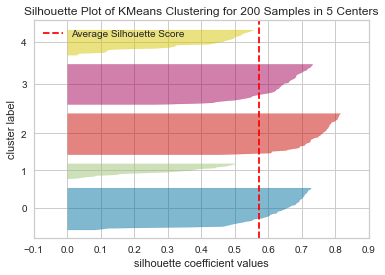

In [7]:
plot_model(kmeans, plot = 'silhouette')

Another useful method is the **elbow method**, which is a heuristic method of interpretation and validation of consistency within cluster analysis designed to **help find the appropriate number of clusters** in a dataset.

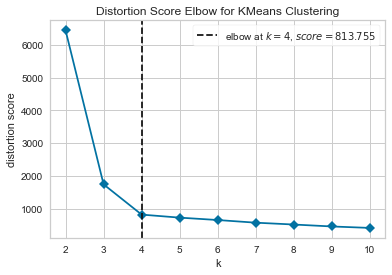

In [8]:
plot_model(kmeans, plot = 'elbow')

In this example the Elbow plot above suggests that 5 is the optimal number of clusters. Usually there is a clear angle, *elbow*, in the distortion scores, and that cutoff point is where adding another cluster doesn't give much better modeling of the data.

---

### Centroids 

The **model** here is itself a python *object*, and can thus have certain attributes, such as the centroids locations:

In [ ]:
centroids = kmeans.cluster_centers_
centroids

In [ ]:
# Make a function for common plot formatting
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())  # no tick labels
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='black')          # axis labels
    ax.set_ylabel('feature 2', color='black')
    ax.set_title(title, color='black')                 # title

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# plot datapoints
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], marker='o', edgecolors='blue', s=400)

# use plot formatting function defined above
format_plot(ax, 'Simulated Input Data')


plt.show()

## Plot the model

The `plot_model()` function can be used to analyze different aspects of the clustering model. This function takes a trained model object and returns a plot. See examples below:

### PCA plot

In [ ]:
plot_model(kmeans, plot = 'cluster') #cluster is default

### Distribution plot 

The distribution plot shows the size of each cluster. When hovering over the bars you will see the number of samples assigned to each cluster. We can also use the distribution plot to see the distribution of cluster labels in association with any other numeric or categorical feature. Features are column names of your dataframe, but in this case *feature_1* has been autogenerated since column names weren't passed. See an example below:

In [ ]:
plot_model(kmeans, plot = 'distribution', feature='feature_1') 

## Compare to original clusters

Predicted clusters are saved in the model object:

In [ ]:
pred = kmeans.labels_
pred

In [ ]:
fig = plt.figure(figsize=(16,5)) # create plot

ax = fig.add_subplot(131) # add subplot for original clusters

scatter(X, y) # use previously defined function
plt.title('Original clusters') # add title

ax = fig.add_subplot(132) # subplot for kmeans clusters
                     
scatter(X, pred)
plt.title('KMeans clusters')

<div class='alert alert-warning'>
    <h4> Ex2. Calculate how well predicted clusters match the originals. </h4>
</div> 


In [ ]:
# Ex2
